In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import plotly.graph_objects as go

#Function ✅

In [ ]:
def analyze_xrd_data(filename, w, peak_ranges):
    #  CSV file
    data = pd.read_csv(filename + '.csv')

    # 2-theta and intensity
    theta = data.iloc[:, 0].values
    intensity = data.iloc[:, 1].values

    intensity -= w

    # Gaussian function
    def gaussian(x, A, mu, sigma, n):
        return A * np.exp(-(x - mu)**2 / (2 * sigma**2)) + n

    # Define colors for fitted curves
    colors = ['midnightblue', 'forestgreen', 'chocolate', 'darkmagenta', 'red', 'magenta']

    # Perform curve fitting for each peak
    plt.figure(figsize=(10, 6))
    plt.plot(theta, intensity, label='Experimental Data', color='cornflowerblue')

    fwhm_list = []
    peak_positions = []

    for i, (peak_range, sigma, n, amplitude) in enumerate(peak_ranges):
        mask = (theta >= peak_range[0]) & (theta <= peak_range[1])
        p0 = (amplitude, np.mean(peak_range), sigma, n)  # Initial guess for fitting

        try:
            peak_x = theta[mask]
            peak_y = gaussian(peak_x, *p0)

            # Plot fitted curve with Matplotlib
            plt.plot(peak_x, peak_y, label=f'Peak {i + 1}', color=colors[i])

            # Calculate FWHM
            fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma
            fwhm_list.append(fwhm)

            # Find maximum intensity and corresponding 2-theta
            max_intensity = np.max(peak_y)
            max_intensity_index = np.argmax(peak_y)
            max_2theta = peak_x[max_intensity_index]
            peak_positions.append((max_2theta, max_intensity))
        except RuntimeError:
            print(f"Failed to fit Gaussian for peak range {peak_range}")



    # Add labels and legend to the static plot
    plt.xlabel('2-Theta')
    plt.ylabel('Intensity')
    plt.legend()
    plt.title('XRD Data with Fitted Gaussian Peaks')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    # Save static plot
    plt.savefig(filename + '_static_plot.png')

    # Close Matplotlib plot
    plt.close()

    #  trace for experimental data
    trace_exp = go.Scatter(x=theta, y=intensity, mode='lines', name='Experimental Data', line=dict(color='cornflowerblue'))

    # Initialize data list for traces
    data = [trace_exp]

    for i, (peak_range, sigma, n, amplitude) in enumerate(peak_ranges):
        mask = (theta >= peak_range[0]) & (theta <= peak_range[1])
        p0 = (amplitude, np.mean(peak_range), sigma, n)  # Initial guess for fitting

        try:
            peak_x = theta[mask]
            peak_y = gaussian(peak_x, *p0)

            #  trace for fitted curve
            trace_fit = go.Scatter(x=peak_x, y=peak_y, mode='lines', name=f'Peak {i + 1}', line=dict(color=colors[i]))
            data.append(trace_fit)
        except RuntimeError:
            print(f"Failed to fit Gaussian for peak range {peak_range}")

    #  layout for Plotly plot
    layout = go.Layout(
        title='XRD Data with Fitted Gaussian Peaks',
        xaxis=dict(title='2-Theta'),
        yaxis=dict(title='Intensity'),
        legend=dict(orientation='h', x=0.5, y=-0.2)
    )

    #  Plotly figure
    fig = go.Figure(data=data, layout=layout)
    fig.show()

    # Save interactive plot
    fig.write_html(filename + '_interactive_plot.html')

    # Output data
    data = {'FWHM {}'.format(i + 1): fwhm_list[i] if i < len(fwhm_list) else np.nan for i in range(6)}
    data.update({'2-theta {}'.format(i + 1): peak_positions[i][0] if i < len(peak_positions) else np.nan for i in range(6)})
    data.update({'Intensity {}'.format(i + 1): peak_positions[i][1] if i < len(peak_positions) else np.nan for i in range(6)})

    #
    df = pd.DataFrame(data, index=[filename])

    return df

##sample5

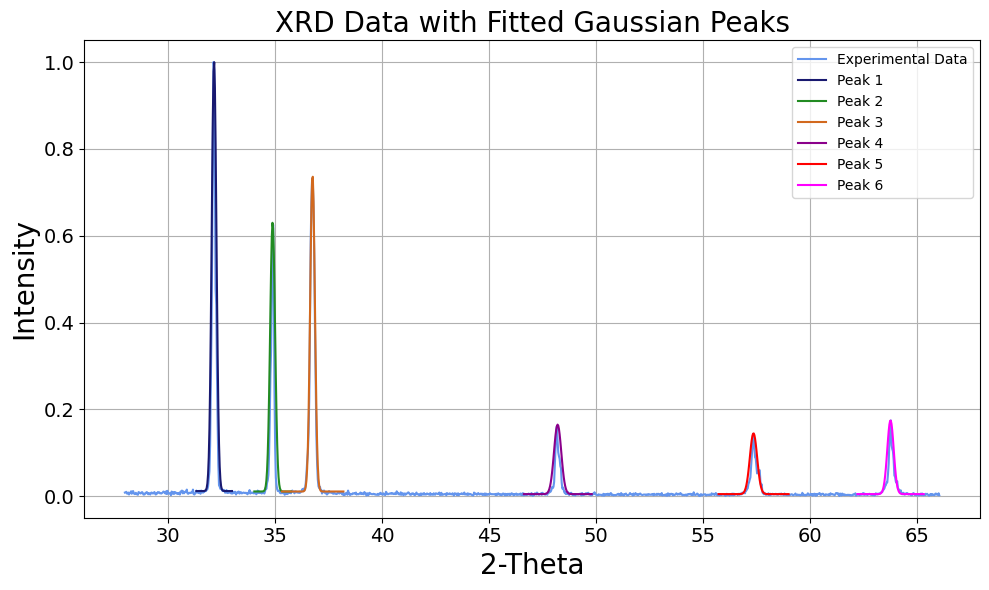

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample5,0.25903,0.270804,0.25903,0.400319,0.400319,0.353223,32.157712,34.877881,36.763115,48.196933,57.361026,63.765168,0.99957,0.629813,0.73583,0.164974,0.144706,0.174133


In [ ]:
#  sigma, baseline, and amplitude peak range


peak_ranges = [

((31.3, 33), 0.11, 0.012, 0.99),

((34, 35.77), 0.115, 0.011, 0.62),

((35.3, 38.2), 0.11, 0.011, 0.73),

((46.6, 49.8), 0.17, 0.005, 0.16),

 ((55.7, 59), 0.17, 0.005, 0.14),

((62.2, 65.3), 0.15, 0.005, 0.17)]


df5 = analyze_xrd_data("sample5", 4, peak_ranges)
df5

In [ ]:
df5.to_excel('df5.xlsx')

##sample4

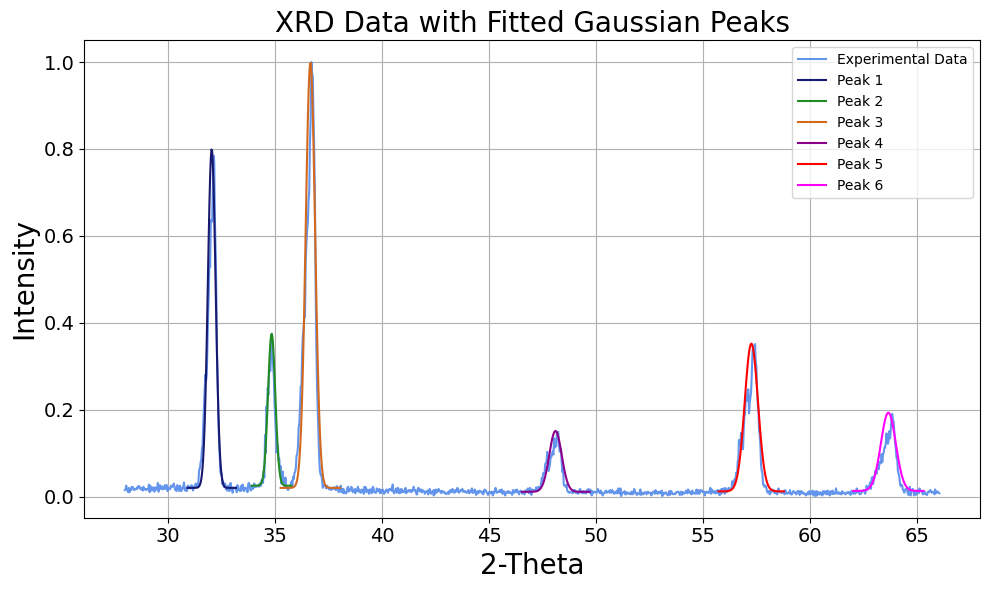

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample4,0.423868,0.400319,0.51806,0.682898,0.729994,0.824187,32.029843,34.846278,36.663463,48.100834,57.236069,63.665539,0.798759,0.374761,0.998167,0.150999,0.351657,0.192823


In [ ]:
#  sigma, baseline, and amplitude peak range


peak_ranges = [

((30.88, 33.2), 0.18, 0.02, 0.78),

((33.9, 35.78), 0.17, 0.025, 0.35),

((35.25, 38.05), 0.22, 0.020, 0.98),


((46.5, 49.7), 0.29, 0.011, 0.14),


((55.7, 58.8), 0.31, 0.012, 0.34),


((62, 65.3), 0.35, 0.013, 0.18)]


df4 = analyze_xrd_data("sample4", 3, peak_ranges)
df4

In [ ]:
df4.to_excel('d4.xlsx')

##sample2

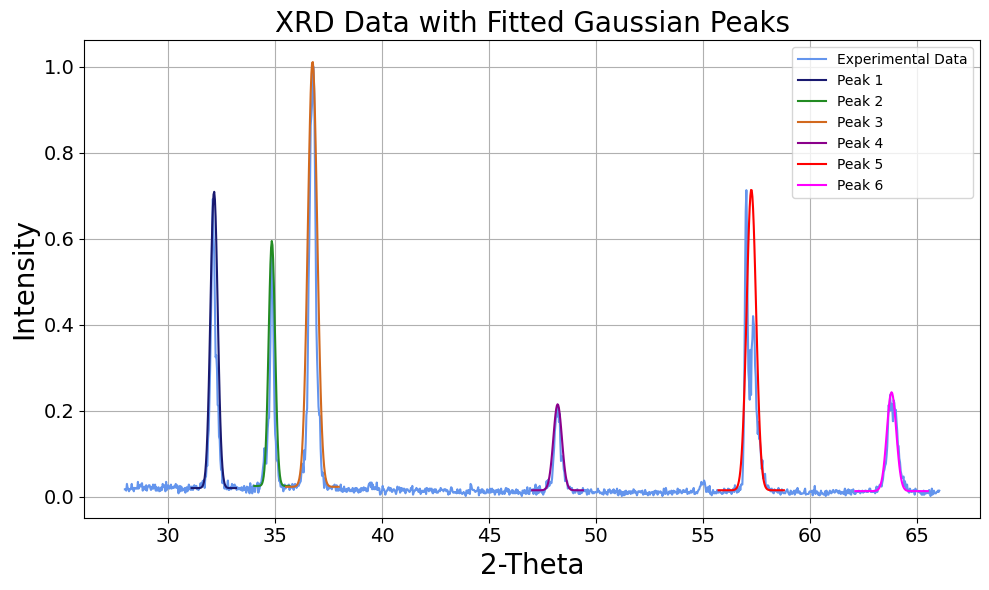

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample2,0.400319,0.353223,0.51806,0.470964,0.51806,0.51806,32.157712,34.846278,36.763115,48.196933,57.236069,63.798355,0.70929,0.594825,1.011243,0.214976,0.713598,0.242994


In [ ]:
#  sigma, baseline, and amplitude =>>> peak range


peak_ranges = [



       ((31.1, 33.2), 0.17, 0.02, 0.69),

                  ((34, 35.7), 0.15, 0.025, 0.57),

              ((35.5, 38), 0.22, 0.023, 0.99),

               ((47, 49.4), 0.2, 0.015, 0.2),


                 ((55.7, 58.8), 0.22, 0.015, 0.7),


                 ((62.1, 65.5), 0.22, 0.013, 0.23)]


df2 = analyze_xrd_data("sample2", 1, peak_ranges)
df2

In [ ]:
df2.to_excel('df2.xlsx')

##sample1

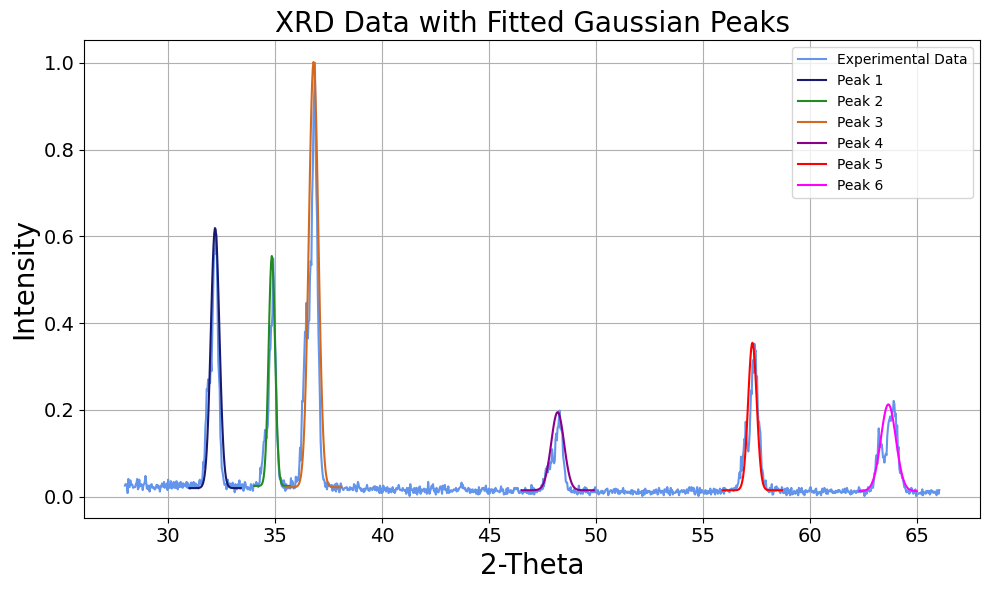

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample1,0.470964,0.353223,0.51806,0.706446,0.470964,0.824187,32.189663,34.846278,36.796326,48.196933,57.298563,63.665539,0.619199,0.554837,1.001863,0.194991,0.354991,0.212803


In [ ]:
#  sigma, baseline, and amplitude =>>> peak range


peak_ranges = [



       ((31, 33.4), 0.2, 0.02, 0.6),



                  ((34, 35.7), 0.15, 0.025, 0.53),



              ((35.5, 38.1), 0.22, 0.022, 0.98),


               ((46.5, 49.9), 0.3, 0.015, 0.18),


                 ((55.9, 58.7), 0.2, 0.015, 0.34),


                 ((62.3, 65), 0.35, 0.013, 0.2)]


df1 = analyze_xrd_data("sample1", 0, peak_ranges)
df1

In [ ]:
df1.to_excel('df1.xlsx')

##sample3

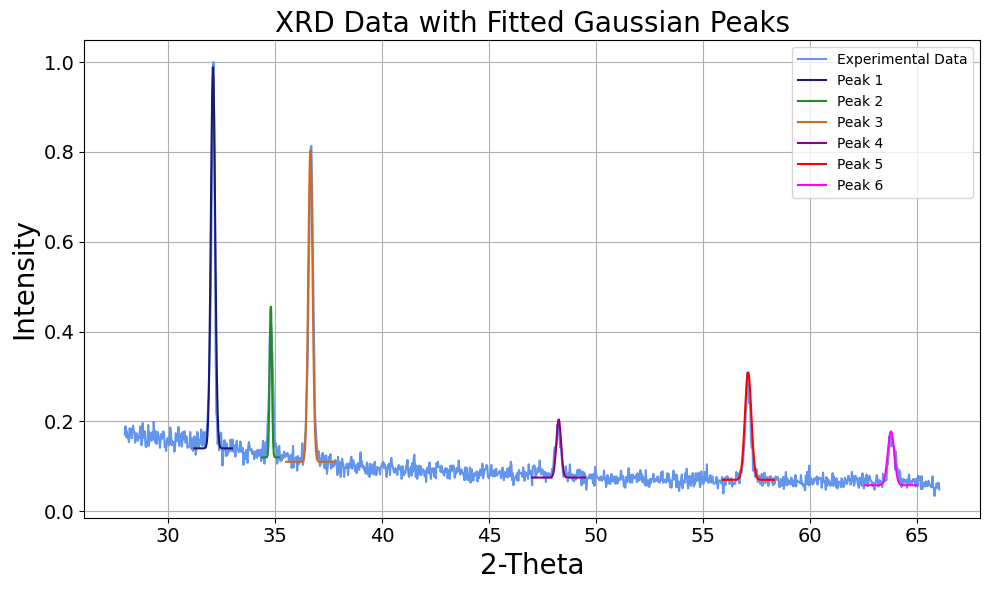

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample3,0.235482,0.117741,0.235482,0.25903,0.353223,0.353223,32.09379,34.814691,36.663463,48.26098,57.110979,63.765168,0.988363,0.455213,0.803685,0.204354,0.309358,0.177743


In [ ]:
#  sigma, baseline, and amplitude =>peak range
peak_ranges = [



       ((31.2, 33), 0.1, 0.14, 0.85),



                  ((34.4, 35.2), 0.05, 0.12, 0.35),


              ((35.5, 37.8), 0.1, 0.11, 0.7),


               ((47, 49.5), 0.11, 0.075, 0.13),


                 ((55.9, 58.3), 0.15, 0.07, 0.24),


  ((62.55, 65), 0.15, 0.058, 0.12)]


df3 = analyze_xrd_data("sample3", 2, peak_ranges)
df3

In [ ]:
df3.to_excel('df3.xlsx')

#data

*   concate
*   calculate relative intesity , Sherer parameter



In [ ]:
output=pd.concat([df1,df2,df3,df4,df5])

In [ ]:
output

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,2-theta 5,2-theta 6,Intensity 1,Intensity 2,Intensity 3,Intensity 4,Intensity 5,Intensity 6
sample1,0.470964,0.353223,0.518060,0.706446,0.470964,0.824187,32.189663,34.846278,36.796326,48.196933,57.298563,63.665539,0.619199,0.554837,1.014862,0.194991,0.354991,0.212803
sample2,0.400319,0.353223,0.518060,0.470964,0.518060,0.518060,32.157712,34.846278,36.763115,48.196933,57.236069,63.798355,0.709290,0.594825,1.011243,0.214976,0.713598,0.242994
sample3,0.235482,0.117741,0.235482,0.259030,0.353223,0.353223,32.093790,34.814691,36.663463,48.260980,57.110979,63.765168,0.988363,0.455213,0.803685,0.204354,0.309358,0.177743
sample4,0.423868,0.400319,0.518060,0.682898,0.729994,0.824187,32.029843,34.846278,36.663463,48.100834,57.236069,63.665539,0.798759,0.374761,0.998167,0.150999,0.351657,0.192823
sample5,0.259030,0.270804,0.259030,0.400319,0.400319,0.353223,32.157712,34.877881,36.763115,48.196933,57.361026,63.765168,0.999570,0.629813,0.735830,0.164974,0.144706,0.174133


In [ ]:

#relative intensity


normalized_intensities = output.iloc[:, 12:] / output.iloc[:, 12:].max() * 100

max_intensity_index = np.argmax(normalized_intensities.values)

relative_intensities = normalized_intensities / normalized_intensities.iloc[max_intensity_index] * 100

for i in range(6):
    output[f'Relative Intensity {i+1}'] = relative_intensities.iloc[:, i]

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,...,Intensity 3,Intensity 4,Intensity 5,Intensity 6,Relative Intensity 1,Relative Intensity 2,Relative Intensity 3,Relative Intensity 4,Relative Intensity 5,Relative Intensity 6
sample1,0.470964,0.353223,0.518060,0.706446,0.470964,0.824187,32.189663,34.846278,36.796326,48.196933,...,1.014862,0.194991,0.354991,0.212803,62.648986,121.885173,126.276100,95.418043,114.750945,119.725430
sample2,0.400319,0.353223,0.518060,0.470964,0.518060,0.518060,32.157712,34.846278,36.763115,48.196933,...,1.011243,0.214976,0.713598,0.242994,71.764178,130.669568,125.825745,105.198076,230.670628,136.711005
sample3,0.235482,0.117741,0.235482,0.259030,0.353223,0.353223,32.093790,34.814691,36.663463,48.260980,...,0.803685,0.204354,0.309358,0.177743,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
sample4,0.423868,0.400319,0.518060,0.682898,0.729994,0.824187,32.029843,34.846278,36.663463,48.100834,...,0.998167,0.150999,0.351657,0.192823,80.816397,82.326664,124.198767,73.891099,113.673116,108.484282
sample5,0.259030,0.270804,0.259030,0.400319,0.400319,0.353223,32.157712,34.877881,36.763115,48.196933,...,0.735830,0.164974,0.144706,0.174133,101.133912,138.355827,91.557041,80.729497,46.776174,97.969272


In [ ]:
#theta

for i in range(1, 7):  # 6 peaks
    theta_col = f'2-theta {i}'

    output[f'Theta_{i}'] = output[theta_col] / 2

In [ ]:
def cos_degrees(angle_degrees):
    angle_radians = math.radians(angle_degrees)
    return math.cos(angle_radians)

cos_theta_cols = output[['Theta_1', 'Theta_2', 'Theta_3', 'Theta_4', 'Theta_5', 'Theta_6']].applymap(cos_degrees)

output = pd.concat([output, cos_theta_cols.add_prefix('Cos_')], axis=1)




#  calculate Sherer parameter

def calculate_sherer(fwhm, cos_theta, lamda, k):
    return k * lamda / (fwhm * cos_theta)

#  calculate dislocation density
def calculate_dislocation_density(sherer):
    return 1 / sherer**2


# Constants
lamda = 1.54  # Wavelength in Angstrom
k = 0.089  # Constant


#  Sherer parameter for each peak
for i in range(1, 7):
    fwhm_col = f'FWHM {i}'
    cos_theta_col = f'Cos_Theta_{i}'
    sherer_col = f'Sherer_{i}'
    dislocation_density_col = f'Dislocation_Density_{i}'

    output[sherer_col] = calculate_sherer(output[fwhm_col], output[cos_theta_col], lamda, k)
    output[dislocation_density_col] = calculate_dislocation_density(output[sherer_col])

In [ ]:
output.to_excel('output.xlsx')